In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine, Unit
#dbf
from dbfread import DBF
import seaborn as sns

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
from dbfread import DBF
bus = DBF('data/버스/2019/TB_E_BUSSTOP_2019.dbf')
bus = pd.DataFrame(bus)

TBVIATR = DBF("data/주요시설과 집객시설/2019.dbf")
TBVIATR = pd.DataFrame(TBVIATR)

In [5]:
# 그룹화
group0 = pd.read_csv('data/그룹화/group0.csv')

In [6]:
group0

,역명,사용일자,승차총승객수,하차총승객수,TM_X,TM_Y,위도,경도,노선,출입구,대학교 인원수,중고등학교 인원수
0,강변(동서울터미널),20210101,7925,8325,208367.2887,548408.9657,37.535145,127.09467,1.0,4.0,NaN,NaN
1,강변(동서울터미널),20210102,12457,11820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강변(동서울터미널),20210103,12926,10948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,강변(동서울터미널),20210104,23079,22317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,강변(동서울터미널),20210105,22173,21709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19340,홍대입구,20211227,58934,59832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19341,홍대입구,20211228,62062,63428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19342,홍대입구,20211229,66262,67841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19343,홍대입구,20211230,67940,69130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
group0 = group0.groupby(['역명']).sum().reset_index()

In [8]:
group0.to_excel("g0.xlsx")

In [9]:
group0['총승객수'] = group0['승차총승객수'] + group0['하차총승객수']

In [10]:
group0 = group0.groupby(['역명', '사용일자']).sum().reset_index()

In [12]:
#group0.to_excel('group0.xlsx')

In [13]:
#group0 = group0[['역명', '승차총승객수', '하차총승객수', '위도','경도', '노선']]

In [11]:
TBVIATR['LCLASDC'].value_counts()

교육/보건       13168
산업           2869
숙박/음식        2485
레저/관광/예술      525
행정            510
공공/환경         117
시설물           108
Name: LCLASDC, dtype: int64

### 집객시설 - 총집객시설, 교육보건, 산업, 숙박음식, 행정, 레저관광예술 - contains 변수 바꿔가면서 변수 생성

In [50]:
facilities = TBVIATR[TBVIATR['LCLASDC'].str.contains('교육/보건', na=False)].reset_index(drop=True)
facilities

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,30104,0200,AA0000000001200,교육/보건,교육시설,고등교육기관,공립고등학교,,(구)수도여자고등학교,,,,197793.6963,549652.9113,,,,,
1,,30205,0102,AA0000000008102,교육/보건,보건시설,기타보건시설,약국,메디팜,(주)그린메디팜,,,,202921.6973,553258.6720,,,,,
2,,30106,0000,AA00000000390,교육/보건,교육시설,기타교육기관,미분류,,(주)한국안전보건교육원,,,,202366.6912,556188.0339,,,,,
3,,30204,0000,AA00000000410,교육/보건,보건시설,한의원,,,100년한의원,,,,197670.4869,551416.0771,,,,,
4,,30205,0100,AA0000000042100,교육/보건,보건시설,기타보건시설,약국,미분류,100세약국,,,,191493.2440,548198.3160,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13163,,30201,0000,AA00000197780,교육/보건,보건시설,병/의원,미분류,,힘찬병원,,,,202946.8961,560671.9543,,,,,
13164,,30201,0000,AA00000197790,교육/보건,보건시설,병/의원,미분류,,힘찬병원,,,,209710.1690,545367.4769,,,,,
13165,,30205,0100,AA0000019780100,교육/보건,보건시설,기타보건시설,약국,미분류,힘찬약국,,,,200996.7845,556280.0200,,,,,
13166,,30101,0100,AA0000019781100,교육/보건,교육시설,유아교육기관,어린이집,,힘찬어린이집,,,,192512.0590,553506.2964,,,,,


In [51]:
facilities_xy = DepartmentStore[["X_VALUE", "Y_VALUE"]]
facilities_xy

,X_VALUE,Y_VALUE
0,197793.6963,549652.9113
1,202921.6973,553258.6720
2,202366.6912,556188.0339
3,197670.4869,551416.0771
4,191493.2440,548198.3160
...,...,...
13163,202946.8961,560671.9543
13164,209710.1690,545367.4769
13165,200996.7845,556280.0200
13166,192512.0590,553506.2964


In [52]:
coord = np.array(facilities_xy)

In [53]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [54]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[126.97503354,  37.54638807],
       [127.03307619,  37.57887386],
       [127.02680249,  37.60526876],
       [126.97363371,  37.56227385],
       [126.90375474,  37.53324559]])

In [55]:
facilities_xy["위도"] = result_imt[:, 1]
facilities_xy["경도"] = result_imt[:, 0]

In [56]:
facilities_xy

,X_VALUE,Y_VALUE,위도,경도
0,197793.6963,549652.9113,37.546388,126.975034
1,202921.6973,553258.6720,37.578874,127.033076
2,202366.6912,556188.0339,37.605269,127.026802
3,197670.4869,551416.0771,37.562274,126.973634
4,191493.2440,548198.3160,37.533246,126.903755
...,...,...,...,...
13163,202946.8961,560671.9543,37.645667,127.033391
13164,209710.1690,545367.4769,37.507728,127.109823
13165,200996.7845,556280.0200,37.606100,127.011289
13166,192512.0590,553506.2964,37.581079,126.915227


In [57]:
facilities_xy = np.array(facilities_xy[['위도', '경도']])
facilities_xy

array([[ 37.54638807, 126.97503354],
       [ 37.57887386, 127.03307619],
       [ 37.60526876, 127.02680249],
       ...,
       [ 37.60610005, 127.01128859],
       [ 37.58107913, 126.91522742],
       [ 37.48480938, 126.97967634]])

In [58]:
#역 이름 array 형식 바꾸기
group0_name = group0[['역명']]
name = np.array(group0_name)
name = np.squeeze(name)

In [59]:
#역 좌표
result_sub = np.array(group0[['위도', '경도']])

In [60]:
# 0.5km 반경에 있는 백화점

facilities_count = []
facilities_bol = []
print('백화점\n')
i = 0
for a, b in result_sub:
    lyon = (a, b)
    count = 0
    for c, d in facilities_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            facilities_bol.append([c, d])
        
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    facilities_count.append(count)
len(facilities_bol)

백화점

강변(동서울터미널) -> 9 개
개롱 -> 34 개
개화산 -> 23 개
건대입구 -> 39 개
고덕 -> 14 개
고려대(종암) -> 45 개
고속터미널 -> 7 개
김포공항 -> 2 개
노원 -> 20 개
녹사평(용산구청) -> 7 개
당산 -> 25 개
대치 -> 10 개
독립문 -> 20 개
동대문 -> 57 개
동대문역사문화공원(DDP) -> 22 개
동작(현충원) -> 0 개
마장 -> 14 개
마포구청 -> 19 개
망원 -> 59 개
모란 -> 0 개
발산 -> 26 개
사당 -> 26 개
상수 -> 31 개
성신여대입구(돈암) -> 52 개
송정 -> 33 개
신당 -> 44 개
신도림 -> 10 개
신촌 -> 51 개
안암(고대병원앞) -> 72 개
약수 -> 39 개
어린이대공원(세종대) -> 34 개
영등포시장 -> 60 개
오목교(목동운동장앞) -> 28 개
올림픽공원(한국체대) -> 6 개
왕십리(성동구청) -> 43 개
용두(동대문구청) -> 21 개
월드컵경기장(성산) -> 4 개
이대 -> 37 개
이수 -> 38 개
이촌(국립중앙박물관) -> 7 개
이태원 -> 20 개
일원 -> 19 개
잠실(송파구청) -> 2 개
장지 -> 6 개
제기동 -> 81 개
종합운동장 -> 6 개
천호(풍납토성) -> 38 개
청량리(서울시립대입구) -> 29 개
총신대입구(이수) -> 38 개
학여울 -> 5 개
한성대입구(삼선교) -> 63 개
혜화 -> 86 개
홍대입구 -> 53 개


1534

In [61]:
i = 0
sb = []
for a, b in result_sub:
    sb.append(name[i])
    i+= 1
sb[:5]

['강변(동서울터미널)', '개롱', '개화산', '건대입구', '고덕']

In [62]:
교육보건 = pd.DataFrame(data = list(zip(sb, facilities_count)), columns = ['역명','교육/보건'])

In [ ]:
## 백화점

In [63]:
DepartmentStore = TBVIATR[TBVIATR['BCLASDC'].str.contains('백화점', na=False)].reset_index(drop=True)

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,70301,0102,AA0000001486102,산업,서비스산업,종합상품판매업,백화점,갤러리아백화점,갤러리아백화점,,,,203698.9621,547603.6801,,,,,
1,,70301,0102,AA0000001487102,산업,서비스산업,종합상품판매업,백화점,갤러리아백화점,갤러리아백화점서관,,,,203508.4900,547670.0000,,,,,
2,,70301,0106,AA0000003978106,산업,서비스산업,종합상품판매업,백화점,뉴코아백화점,뉴코아백화점,,,,200660.1157,545529.6694,,,,,
3,,70301,0107,AA0000005747107,산업,서비스산업,종합상품판매업,백화점,롯데백화점,롯데백화점,,,,204696.4200,544174.4400,,,,,
4,,70301,0107,AA0000005748107,산업,서비스산업,종합상품판매업,백화점,롯데백화점,롯데백화점,,,,206313.1643,548836.0885,,,,,
5,,70301,0107,AA0000005749107,산업,서비스산업,종합상품판매업,백화점,롯데백화점,롯데백화점,,,,205435.3931,561703.2492,,,,,
6,,70301,0107,AA0000005750107,산업,서비스산업,종합상품판매업,백화점,롯데백화점,롯데백화점,,,,198388.0601,551688.0946,,,,,
7,,70301,0107,AA0000005751107,산업,서비스산업,종합상품판매업,백화점,롯데백화점,롯데백화점강남점,,,,204757.5892,544173.8357,,,,,
8,,70301,0107,AA0000005752107,산업,서비스산업,종합상품판매업,백화점,롯데백화점,롯데백화점관악점,,,,193347.4714,543489.1210,,,,,
9,,70301,0107,AA0000005753107,산업,서비스산업,종합상품판매업,백화점,롯데백화점,롯데백화점롯데호텔,,,,198321.2202,551757.5025,,,,,


In [64]:
DepartmentStore_xy = Movie[["X_VALUE", "Y_VALUE"]]
coord = np.array(DepartmentStore_xy)

In [65]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.02942081,  37.52434232],
       [126.9226373 ,  37.55648677],
       [126.94030644,  37.55657383],
       [127.06690069,  37.53978858],
       [127.0370532 ,  37.52291031]])

In [68]:
DepartmentStore_xy["위도"] = result_imt[:, 1]
DepartmentStore_xy["경도"] = result_imt[:, 0]
DepartmentStore_xy = np.array(DepartmentStore_xy[['위도', '경도']])

In [69]:
# 0.5km 반경에 있는 영화관

DepartmentStore_count = []
DepartmentStore_bol = []
print('영화관\n')
i = 0
for a, b in result_sub:
    lyon = (a, b)
    count = 0
    for c, d in DepartmentStore_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            DepartmentStore_bol.append([c, d])

            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    DepartmentStore_count.append(count)
len(DepartmentStore_bol)

영화관

강변(동서울터미널) -> 0 개
개롱 -> 0 개
개화산 -> 0 개
건대입구 -> 1 개
고덕 -> 0 개
고려대(종암) -> 0 개
고속터미널 -> 0 개
김포공항 -> 0 개
노원 -> 0 개
녹사평(용산구청) -> 0 개
당산 -> 0 개
대치 -> 0 개
독립문 -> 0 개
동대문 -> 0 개
동대문역사문화공원(DDP) -> 0 개
동작(현충원) -> 0 개
마장 -> 0 개
마포구청 -> 0 개
망원 -> 0 개
모란 -> 0 개
발산 -> 0 개
사당 -> 0 개
상수 -> 0 개
성신여대입구(돈암) -> 0 개
송정 -> 0 개
신당 -> 0 개
신도림 -> 0 개
신촌 -> 2 개
안암(고대병원앞) -> 0 개
약수 -> 0 개
어린이대공원(세종대) -> 0 개
영등포시장 -> 0 개
오목교(목동운동장앞) -> 0 개
올림픽공원(한국체대) -> 0 개
왕십리(성동구청) -> 0 개
용두(동대문구청) -> 0 개
월드컵경기장(성산) -> 0 개
이대 -> 0 개
이수 -> 0 개
이촌(국립중앙박물관) -> 0 개
이태원 -> 0 개
일원 -> 0 개
잠실(송파구청) -> 0 개
장지 -> 0 개
제기동 -> 0 개
종합운동장 -> 0 개
천호(풍납토성) -> 1 개
청량리(서울시립대입구) -> 0 개
총신대입구(이수) -> 0 개
학여울 -> 0 개
한성대입구(삼선교) -> 0 개
혜화 -> 0 개
홍대입구 -> 2 개


6

In [70]:
i = 0
sb = []
for a, b in result_sub:
    sb.append(name[i])
    i+= 1
sb[:5]

['강변(동서울터미널)', '개롱', '개화산', '건대입구', '고덕']

In [71]:
DepartmentStore_count = pd.DataFrame(data = list(zip(sb, DepartmentStore_count)), columns = ['역명','영화관 개수'])

## 영화관

In [ ]:
# CGV, 메가박스, 롯데시네마 

In [25]:
Movie_CGV = TBVIATR[TBVIATR['BCLASDC'].str.contains('CGV', na=False)].reset_index(drop=True)
Movie_CGV

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,60204,0101,AA0000000145101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,202600.7033,547206.2178,,,,,
1,,60204,0101,AA0000000146101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,193164.3250,550776.2660,,,,,
2,,60204,0101,AA0000000147101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,194725.5548,550784.7903,,,,,
3,,60204,0101,AA0000000148101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV(건대점),,,,205912.5834,548922.2587,,,,,
4,,60204,0101,AA0000000149101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV극장,,,,203275.4441,547047.5211,,,,,
5,,60204,0101,AA0000000150101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV상봉점,,,,208146.2946,555322.2024,,,,,
6,,60204,0101,AA0000000914101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,NJ빌딩CGV,,,,202600.7030,547206.2180,,,,,
7,,60204,0101,AA0000008163101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,상봉듀오트리스CGV상봉점,,,,208146.2950,555322.2020,,,,,
8,,60204,0101,AA0000011954101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,씨네시티빌딩CGV극장,,,,203275.4440,547047.5210,,,,,
9,,60204,0101,AA0000012252101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,아트레온CGV,,,,194725.5550,550784.7900,,,,,


In [26]:
Movie_메가박스 = TBVIATR[TBVIATR['BCLASDC'].str.contains('메가박스', na=False)].reset_index(drop=True)
Movie_메가박스

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,60204,0103,AA0000006107103,레저/관광/예술,문화/예술시설,극장,일반영화관,메가박스,메가박스,,,,202632.0516,560310.6852,,,,,
1,,60204,0103,AA0000006108103,레저/관광/예술,문화/예술시설,극장,일반영화관,메가박스,메가박스,,,,185650.6000,549021.3980,,,,,
2,,60204,0103,AA0000006109103,레저/관광/예술,문화/예술시설,극장,일반영화관,메가박스,메가박스,,,,203419.2765,561664.6668,,,,,
3,,60204,0103,AA0000006110103,레저/관광/예술,문화/예술시설,극장,일반영화관,메가박스,메가박스은평점,,,,193180.4550,557582.2240,,,,,


In [27]:
Movie_롯데시네마 = TBVIATR[TBVIATR['BCLASDC'].str.contains('롯데시네마', na=False)].reset_index(drop=True)
Movie_롯데시네마

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,60204,0102,AA0000005772102,레저/관광/예술,문화/예술시설,극장,일반영화관,롯데시네마,롯데시네마,,,,211102.1392,548591.4642,,,,,
1,,60204,0102,AA0000005773102,레저/관광/예술,문화/예술시설,극장,일반영화관,롯데시네마,롯데시네마,,,,190196.4620,542033.4450,,,,,
2,,60204,0102,AA0000005774102,레저/관광/예술,문화/예술시설,극장,일반영화관,롯데시네마,롯데시네마,,,,193373.7800,550862.0380,,,,,
3,,60204,0102,AA0000005775102,레저/관광/예술,문화/예술시설,극장,일반영화관,롯데시네마,롯데시네마합정,,,,192372.6950,550184.0490,,,,,


In [28]:
Movie = Movie_CGV.append(Movie_메가박스).append(Movie_롯데시네마)

In [29]:
Movie_xy = Movie[["X_VALUE", "Y_VALUE"]]

In [30]:
coord = np.array(Movie_xy)

In [31]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.02942081,  37.52434232],
       [126.9226373 ,  37.55648677],
       [126.94030644,  37.55657383],
       [127.06690069,  37.53978858],
       [127.0370532 ,  37.52291031]])

In [32]:
Movie_xy["위도"] = result_imt[:, 1]
Movie_xy["경도"] = result_imt[:, 0]

In [33]:
Movie_xy = np.array(Movie_xy[['위도', '경도']])

In [34]:
# 0.5km 반경에 있는 영화관

Movie_count = []
Movie_bol = []
print('영화관\n')
i = 0
for a, b in result_sub:
    lyon = (a, b)
    count = 0
    for c, d in Movie_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            Movie_bol.append([c, d])

            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    Movie_count.append(count)
len(Movie_bol)

영화관

강변(동서울터미널) -> 0 개
개롱 -> 0 개
개화산 -> 0 개
건대입구 -> 1 개
고덕 -> 0 개
고려대(종암) -> 0 개
고속터미널 -> 0 개
김포공항 -> 0 개
노원 -> 0 개
녹사평(용산구청) -> 0 개
당산 -> 0 개
대치 -> 0 개
독립문 -> 0 개
동대문 -> 0 개
동대문역사문화공원(DDP) -> 0 개
동작(현충원) -> 0 개
마장 -> 0 개
마포구청 -> 0 개
망원 -> 0 개
모란 -> 0 개
발산 -> 0 개
사당 -> 0 개
상수 -> 0 개
성신여대입구(돈암) -> 0 개
송정 -> 0 개
신당 -> 0 개
신도림 -> 0 개
신촌 -> 2 개
안암(고대병원앞) -> 0 개
약수 -> 0 개
어린이대공원(세종대) -> 0 개
영등포시장 -> 0 개
오목교(목동운동장앞) -> 0 개
올림픽공원(한국체대) -> 0 개
왕십리(성동구청) -> 0 개
용두(동대문구청) -> 0 개
월드컵경기장(성산) -> 0 개
이대 -> 0 개
이수 -> 0 개
이촌(국립중앙박물관) -> 0 개
이태원 -> 0 개
일원 -> 0 개
잠실(송파구청) -> 0 개
장지 -> 0 개
제기동 -> 0 개
종합운동장 -> 0 개
천호(풍납토성) -> 1 개
청량리(서울시립대입구) -> 0 개
총신대입구(이수) -> 0 개
학여울 -> 0 개
한성대입구(삼선교) -> 0 개
혜화 -> 0 개
홍대입구 -> 2 개


6

In [35]:
i = 0
sb = []
for a, b in result_sub:
    sb.append(name[i])
    i+= 1
sb[:5]

['강변(동서울터미널)', '개롱', '개화산', '건대입구', '고덕']

In [36]:
Movie_count = pd.DataFrame(data = list(zip(sb, Movie_count)), columns = ['역명','영화관 개수'])

## bus

In [37]:
# 서울시 버스정류장 공간데이터 #EPSG:5186
bus = DBF('data/버스/2019/TB_E_BUSSTOP_2019.dbf')
bus = pd.DataFrame(bus)

In [38]:
bus_s = bus[["TM_X", "TM_Y"]]
bus_s

,TM_X,TM_Y
0,198920.990795,552247.155925
1,199692.618782,553292.015192
2,199848.973782,553683.796125
3,198896.329903,552115.980102
4,200149.651139,554074.605152
...,...,...
11175,212311.649657,550111.679161
11176,212375.768437,550131.480643
11177,210913.597545,548250.012112
11178,211084.064779,548529.112440


In [39]:
coord = np.array(bus_s)

# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)

In [40]:
bus["위도"] = result_imt[:, 1]
bus["경도"] = result_imt[:, 0]

In [41]:
result_sub = np.array(group0[['위도', '경도']])
bus_spare = np.array(bus[['위도', '경도']])
bus_spare

array([[ 37.56976415, 126.98778615],
       [ 37.57917886, 126.99652016],
       [ 37.58270882, 126.99829016],
       ...,
       [ 37.53368604, 127.12347693],
       [ 37.5361987 , 127.12540981],
       [ 37.5403901 , 127.12735353]])

In [42]:
# 역별로 버스의 개수

print("버스 정류장\n")
bus_station = []
i = 0
for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in bus_spare:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 0.5    # 지하철역의 위치값을 기준으로 반경 0.5km내에 포함된 시설 찾기
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    bus_station.append(count)

버스 정류장

강변(동서울터미널) -> 16 개
개롱 -> 14 개
개화산 -> 10 개
건대입구 -> 15 개
고덕 -> 21 개
고려대(종암) -> 23 개
고속터미널 -> 21 개
김포공항 -> 18 개
노원 -> 30 개
녹사평(용산구청) -> 13 개
당산 -> 24 개
대치 -> 15 개
독립문 -> 27 개
동대문 -> 19 개
동대문역사문화공원(DDP) -> 21 개
동작(현충원) -> 6 개
마장 -> 18 개
마포구청 -> 22 개
망원 -> 33 개
모란 -> 0 개
발산 -> 22 개
사당 -> 26 개
상수 -> 27 개
성신여대입구(돈암) -> 28 개
송정 -> 21 개
신당 -> 12 개
신도림 -> 23 개
신촌 -> 32 개
안암(고대병원앞) -> 18 개
약수 -> 15 개
어린이대공원(세종대) -> 13 개
영등포시장 -> 25 개
오목교(목동운동장앞) -> 23 개
올림픽공원(한국체대) -> 8 개
왕십리(성동구청) -> 32 개
용두(동대문구청) -> 16 개
월드컵경기장(성산) -> 22 개
이대 -> 31 개
이수 -> 27 개
이촌(국립중앙박물관) -> 14 개
이태원 -> 20 개
일원 -> 16 개
잠실(송파구청) -> 19 개
장지 -> 18 개
제기동 -> 15 개
종합운동장 -> 6 개
천호(풍납토성) -> 22 개
청량리(서울시립대입구) -> 25 개
총신대입구(이수) -> 27 개
학여울 -> 8 개
한성대입구(삼선교) -> 29 개
혜화 -> 20 개
홍대입구 -> 30 개


In [43]:
bus_count = pd.DataFrame(data = list(zip(sb, bus_station)), columns = ['역명','버스 정류장 개수'])

In [44]:
bus_count

,역명,버스 정류장 개수
0,강변(동서울터미널),16
1,개롱,14
2,개화산,10
3,건대입구,15
4,고덕,21
5,고려대(종암),23
6,고속터미널,21
7,김포공항,18
8,노원,30
9,녹사평(용산구청),13


## 데이터 합치기

In [45]:
group0_dayoff = pd.read_csv('data/그룹화/group0_dayoff.csv')

In [46]:
group0_dayoff = group0_dayoff[['역명','휴일여부', '요일', '데이']]

In [47]:
group0['총승객수'] = group0['승차총승객수'] + group0['하차총승객수']

In [48]:
group0_pl = group0[['역명', '노선', '총승객수']]

In [49]:
group0_pl

,역명,노선,총승객수
0,강변(동서울터미널),1.0,18630849
1,개롱,1.0,3965864
2,개화산,1.0,3205665
3,건대입구,2.0,29638766
4,고덕,1.0,5537615
5,고려대(종암),1.0,4577261
6,고속터미널,3.0,44162248
7,김포공항,4.0,17247560
8,노원,2.0,24542713
9,녹사평(용산구청),1.0,3106754


In [267]:
#Movie_count.to_excel('Movie_count.xlsx')

In [268]:
#DepartmentStore_count.to_excel('DepartmentStore_count.xlsx')

In [269]:
#bus_count.to_excel('bus_count.xlsx')

In [270]:
#group0_dayoff.to_excel('group0_dayoff.xlsx')

In [ ]:
총집객시설, 교육보건, 산업, 숙박음식, 행정, 레저관광예술

In [311]:
group0_sum = pd.merge(Movie_count, 총집객시설, how='outer',on='역명')
group0_sum = pd.merge(group0_sum, 교육보건, how='outer',on='역명')
group0_sum = pd.merge(group0_sum, 산업, how='outer',on='역명')
group0_sum = pd.merge(group0_sum, 숙박음식, how='outer',on='역명')
group0_sum = pd.merge(group0_sum, 행정, how='outer',on='역명')
group0_sum = pd.merge(group0_sum, 레저관광예술, how='outer',on='역명')

In [312]:
group0_18 = pd.merge(group0_18, bus_count, how='outer',on='역명')

In [316]:
group0_18

,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,출입구,...,date,휴일여부,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),승차총승객수_log,버스 정류장 개수
0,2019-01-01,2호선,강변(동서울터미널),29375.0,27265.0,56640.0,208367.2887,548408.9657,1.0,4.0,...,Tuesday,Y,-5.0,-8.2,-0.6,NaN,4.3,2.1,11.464271,16
1,2019-01-02,2호선,강변(동서울터미널),45705.0,42479.0,88184.0,208367.2887,548408.9657,1.0,4.0,...,Wednesday,N,-4.9,-8.8,0.2,NaN,3.6,1.7,11.456873,16
2,2019-01-03,2호선,강변(동서울터미널),44849.0,43580.0,88429.0,208367.2887,548408.9657,1.0,4.0,...,Thursday,N,-3.5,-8.4,3.2,NaN,2.9,1.4,11.487279,16
3,2019-01-04,2호선,강변(동서울터미널),50373.0,49049.0,99422.0,208367.2887,548408.9657,1.0,4.0,...,Friday,N,-1.1,-6.2,4.1,NaN,3.0,1.2,11.667713,16
4,2019-01-05,2호선,강변(동서울터미널),45789.0,44939.0,90728.0,208367.2887,548408.9657,1.0,4.0,...,Saturday,Y,-2.8,-5.5,1.1,NaN,4.3,2.2,11.701055,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28255,2019-10-01,2호선,홍대입구,74428.0,78451.0,152879.0,193407.6064,550859.6077,3.0,9.0,...,Tuesday,N,23.1,17.6,28.2,NaN,4.4,1.8,NaN,30
28256,2019-10-02,경의선,홍대입구,2154.0,2790.0,4944.0,193407.6064,550859.6077,3.0,9.0,...,Wednesday,N,21.6,20.0,24.2,23.1,5.5,3.0,NaN,30
28257,2019-10-02,공항철도 1호선,홍대입구,12274.0,13454.0,25728.0,193407.6064,550859.6077,3.0,9.0,...,Wednesday,N,21.6,20.0,24.2,23.1,5.5,3.0,NaN,30
28258,2019-10-02,2호선,홍대입구,77897.0,87710.0,165607.0,193407.6064,550859.6077,3.0,9.0,...,Wednesday,N,21.6,20.0,24.2,23.1,5.5,3.0,NaN,30


In [308]:
group0_18 = pd.read_csv('data/그룹화/group0_19.csv')
group0_18

,Unnamed: 0,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,...,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),승차총승객수_log,영화관 개수,백화점 개수,버스 정류장 개수
0,0,2019-01-01,2호선,강변(동서울터미널),29375.0,27265.0,56640.0,208367.2887,548408.9657,1.0,...,-5.0,-8.2,-0.6,NaN,4.3,2.1,11.464271,0,0,16
1,1,2019-01-02,2호선,강변(동서울터미널),45705.0,42479.0,88184.0,208367.2887,548408.9657,1.0,...,-4.9,-8.8,0.2,NaN,3.6,1.7,11.456873,0,0,16
2,2,2019-01-03,2호선,강변(동서울터미널),44849.0,43580.0,88429.0,208367.2887,548408.9657,1.0,...,-3.5,-8.4,3.2,NaN,2.9,1.4,11.487279,0,0,16
3,3,2019-01-04,2호선,강변(동서울터미널),50373.0,49049.0,99422.0,208367.2887,548408.9657,1.0,...,-1.1,-6.2,4.1,NaN,3.0,1.2,11.667713,0,0,16
4,4,2019-01-05,2호선,강변(동서울터미널),45789.0,44939.0,90728.0,208367.2887,548408.9657,1.0,...,-2.8,-5.5,1.1,NaN,4.3,2.2,11.701055,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28254,28254,2019-10-01,공항철도 1호선,홍대입구,12261.0,12015.0,24276.0,193407.6064,550859.6077,3.0,...,23.1,17.6,28.2,NaN,4.4,1.8,NaN,1,0,30
28255,28255,2019-10-01,2호선,홍대입구,74428.0,78451.0,152879.0,193407.6064,550859.6077,3.0,...,23.1,17.6,28.2,NaN,4.4,1.8,NaN,1,0,30
28256,28256,2019-10-02,경의선,홍대입구,2154.0,2790.0,4944.0,193407.6064,550859.6077,3.0,...,21.6,20.0,24.2,23.1,5.5,3.0,NaN,1,0,30
28257,28257,2019-10-02,공항철도 1호선,홍대입구,12274.0,13454.0,25728.0,193407.6064,550859.6077,3.0,...,21.6,20.0,24.2,23.1,5.5,3.0,NaN,1,0,30


In [314]:
group0_sum

,역명,영화관 개수,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술
0,강변(동서울터미널),0,15,9,4,0,0,0
1,개롱,0,38,34,3,0,0,1
2,개화산,0,29,23,3,2,0,0
3,건대입구,1,56,39,8,6,1,1
4,고덕,0,22,14,6,1,0,1
5,고려대(종암),0,55,45,3,6,0,1
6,고속터미널,0,16,7,4,2,0,0
7,김포공항,0,2,2,0,0,0,0
8,노원,0,55,20,19,12,4,0
9,녹사평(용산구청),0,17,7,3,2,3,1


In [317]:
group0_sum = pd.merge(group0_sum, Movie_count, how='outer',on='역명')
group0_sum = pd.merge(group0_sum, 백화점, how='outer',on='역명')
#group0_sum = pd.merge(group0_sum,group0_dayoff, how='outer',on='역명')

In [318]:
group0_sum

,역명,영화관 개수_x,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술,영화관 개수_y,백화점
0,강변(동서울터미널),0,15,9,4,0,0,0,0,0
1,개롱,0,38,34,3,0,0,1,0,0
2,개화산,0,29,23,3,2,0,0,0,0
3,건대입구,1,56,39,8,6,1,1,1,1
4,고덕,0,22,14,6,1,0,1,0,0
5,고려대(종암),0,55,45,3,6,0,1,0,0
6,고속터미널,0,16,7,4,2,0,0,0,1
7,김포공항,0,2,2,0,0,0,0,0,0
8,노원,0,55,20,19,12,4,0,0,1
9,녹사평(용산구청),0,17,7,3,2,3,1,0,0


In [273]:
group0_sum = group0_sum[['역명', '영화관 개수', '백화점 개수', '버스 정류장 개수']]

In [274]:
group0_sum

,역명,영화관 개수,백화점 개수,버스 정류장 개수
0,강변(동서울터미널),0,0,16
1,개롱,0,0,14
2,개화산,0,0,10
3,건대입구,1,1,15
4,고덕,0,0,21
5,고려대(종암),0,0,23
6,고속터미널,0,1,21
7,김포공항,0,0,18
8,노원,0,1,30
9,녹사평(용산구청),0,0,13


In [163]:
group0_18 = pd.read_excel("data/subway_group/group0_18.xlsx")

In [319]:
group0_18 = pd.merge(group0_18, group0_sum, how='outer',on='역명')

In [320]:
group0_18

,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,출입구,...,버스 정류장 개수,영화관 개수_x,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술,영화관 개수_y,백화점
0,2019-01-01,2호선,강변(동서울터미널),29375.0,27265.0,56640.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
1,2019-01-02,2호선,강변(동서울터미널),45705.0,42479.0,88184.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
2,2019-01-03,2호선,강변(동서울터미널),44849.0,43580.0,88429.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
3,2019-01-04,2호선,강변(동서울터미널),50373.0,49049.0,99422.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
4,2019-01-05,2호선,강변(동서울터미널),45789.0,44939.0,90728.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28255,2019-10-01,2호선,홍대입구,74428.0,78451.0,152879.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0
28256,2019-10-02,경의선,홍대입구,2154.0,2790.0,4944.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0
28257,2019-10-02,공항철도 1호선,홍대입구,12274.0,13454.0,25728.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0
28258,2019-10-02,2호선,홍대입구,77897.0,87710.0,165607.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0


In [322]:
group0_18

,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,출입구,...,버스 정류장 개수,영화관 개수_x,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술,영화관 개수_y,백화점
0,2019-01-01,2호선,강변(동서울터미널),29375.0,27265.0,56640.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
1,2019-01-02,2호선,강변(동서울터미널),45705.0,42479.0,88184.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
2,2019-01-03,2호선,강변(동서울터미널),44849.0,43580.0,88429.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
3,2019-01-04,2호선,강변(동서울터미널),50373.0,49049.0,99422.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
4,2019-01-05,2호선,강변(동서울터미널),45789.0,44939.0,90728.0,208367.2887,548408.9657,1.0,4.0,...,16,0,15,9,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28255,2019-10-01,2호선,홍대입구,74428.0,78451.0,152879.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0
28256,2019-10-02,경의선,홍대입구,2154.0,2790.0,4944.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0
28257,2019-10-02,공항철도 1호선,홍대입구,12274.0,13454.0,25728.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0
28258,2019-10-02,2호선,홍대입구,77897.0,87710.0,165607.0,193407.6064,550859.6077,3.0,9.0,...,30,2,82,53,7,15,0,7,2,0


In [1]:
group0_18 = group0_18.drop(columns = {'Unnamed: 0'}, axis = 1)

In [323]:
group0_18 = group0_18.drop(columns = {'영화관 개수_x'}, axis = 1)

In [324]:
group0_18 = group0_18.rename(columns = {'영화관 개수_y' : '영화관 개수'})

In [325]:
group0_18 = group0_18.loc[:28257]

In [326]:
group0_18

,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,출입구,...,승차총승객수_log,버스 정류장 개수,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술,영화관 개수,백화점
0,2019-01-01,2호선,강변(동서울터미널),29375.0,27265.0,56640.0,208367.2887,548408.9657,1.0,4.0,...,11.464271,16,15,9,4,0,0,0,0,0
1,2019-01-02,2호선,강변(동서울터미널),45705.0,42479.0,88184.0,208367.2887,548408.9657,1.0,4.0,...,11.456873,16,15,9,4,0,0,0,0,0
2,2019-01-03,2호선,강변(동서울터미널),44849.0,43580.0,88429.0,208367.2887,548408.9657,1.0,4.0,...,11.487279,16,15,9,4,0,0,0,0,0
3,2019-01-04,2호선,강변(동서울터미널),50373.0,49049.0,99422.0,208367.2887,548408.9657,1.0,4.0,...,11.667713,16,15,9,4,0,0,0,0,0
4,2019-01-05,2호선,강변(동서울터미널),45789.0,44939.0,90728.0,208367.2887,548408.9657,1.0,4.0,...,11.701055,16,15,9,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28253,2019-10-01,경의선,홍대입구,2165.0,2494.0,4659.0,193407.6064,550859.6077,3.0,9.0,...,NaN,30,82,53,7,15,0,7,2,0
28254,2019-10-01,공항철도 1호선,홍대입구,12261.0,12015.0,24276.0,193407.6064,550859.6077,3.0,9.0,...,NaN,30,82,53,7,15,0,7,2,0
28255,2019-10-01,2호선,홍대입구,74428.0,78451.0,152879.0,193407.6064,550859.6077,3.0,9.0,...,NaN,30,82,53,7,15,0,7,2,0
28256,2019-10-02,경의선,홍대입구,2154.0,2790.0,4944.0,193407.6064,550859.6077,3.0,9.0,...,NaN,30,82,53,7,15,0,7,2,0


In [330]:
group0_18.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '총승객수', 'TM_X', 'TM_Y', '노선수',
       '출입구', '학생수', '대학생수', 'year', 'month', 'day', 'week', 'date', '휴일여부',
       '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)',
       '평균 풍속(m/s)', '승차총승객수_log', '버스 정류장 개수', '총집객시설', '교육/보건', '산업',
       '숙박/음식', '행정', '레저/관광/예술', '영화관 개수', '백화점'],
      dtype='object')

## 상관관계

In [102]:
group0_l = pd.read_csv('data/그룹화/group_last.csv')

In [103]:
group0_l['승차총승객수_log'] = np.log1p(group0_l['총승객수'])

In [104]:
group0_l

,Unnamed: 0,지하철,사용일자,버스 정류장 개수,데이,백화점 개수,영화관 개수,총승객수,노선,누적휴일,승차총승객수_log
0,0,강변(동서울터미널),20210101,16,1,0,0,16250,1,1,9.695910
1,1,강변(동서울터미널),20210102,16,0,0,0,24277,1,2,10.097326
2,2,강변(동서울터미널),20210103,16,0,0,0,23874,1,3,10.080587
3,3,강변(동서울터미널),20210104,16,1,0,0,45396,1,0,10.723201
4,4,강변(동서울터미널),20210105,16,1,0,0,43882,1,0,10.689282
...,...,...,...,...,...,...,...,...,...,...,...
19340,19340,홍대입구,20211227,30,1,0,1,118766,3,0,11.684919
19341,19341,홍대입구,20211228,30,1,0,1,125490,3,0,11.739989
19342,19342,홍대입구,20211229,30,1,0,1,134103,3,0,11.806371
19343,19343,홍대입구,20211230,30,1,0,1,137070,3,0,11.828254


In [106]:
x_train = group0_l[['영화관 개수', '백화점 개수', '버스 정류장 개수', '노선', '데이', '누적휴일']]

In [107]:
target = group0_l['승차총승객수_log']

In [83]:
group0_sum_corr = group0_l[['총승객수','영화관 개수', '백화점 개수', '버스 정류장 개수', '노선', '데이', '누적휴일']]

<AxesSubplot:title={'center':'그룹0 상관관계'}>

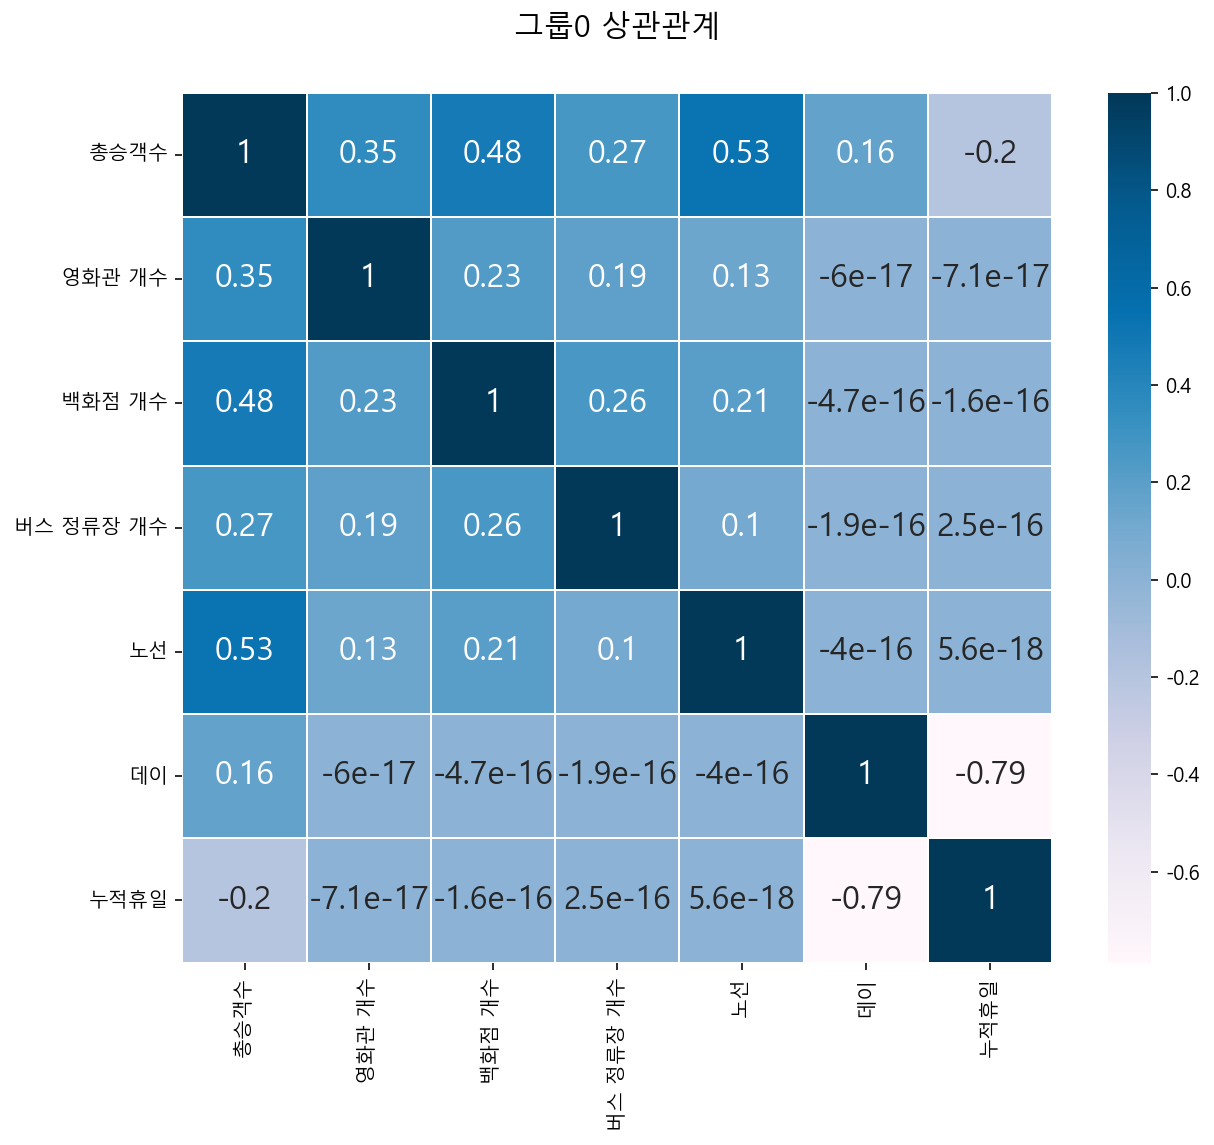

In [84]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("그룹0 상관관계", y = 1.05, size = 15)
sns.heatmap(group0_sum_corr.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})